In [1]:
from __future__ import division
import numpy as np
import scipy.sparse as spar
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

In [2]:
def prob1():
    h = (b-a)/n
    
    # u' stuff
    x = np.linspace(a,b,n+1)
    A = spar.spdiags([-np.ones(n-1), np.zeros(n-1), np.ones(n-1)],
                    [0,1,2], n-1, n+1).toarray()
    du = (1/(2*h))*A.dot(u(x))
    print u(x)
    
    # u'' stuff
    A = spar.spdiags([np.ones(n-1), -2*np.ones(n-1), np.ones(n-1)], 
                     [0,1,2], n-1, n+1).toarray()
    d2u = (1/h**2)*A.dot(u(x))

    result = .5*d2u - du
    return result

n = 10
a = 0
b = 1
u = lambda x : np.sin((x+np.pi)**2 - 1)
prob1()

[ 0.5270908  -0.08304921 -0.67536794 -0.988619   -0.85393046 -0.30045872
  0.41972741  0.9289119   0.9214555   0.36486899 -0.43030122]


array([  6.90335739,  18.4812328 ,  23.28979198,  17.49835925,
         1.96742981, -16.69693491, -28.34068466, -41.05539612,  50.68005277])

## Problem 2

In [3]:
import scipy.linalg as la

def prob2(f, eps, alpha, beta, n):
    h = 1/n
    A = spar.spdiags([(eps+h/2)*np.ones(n+1), -2*eps*np.ones(n+1), (eps-h/2)*np.ones(n+1)], 
                    [0,1,2], n-1, n+1).toarray()
    A = np.vstack((np.zeros(n+1), A, np.zeros(n+1)))
    A[0,0] = h**2
    A[-1,-1] = h**2
    b = -1*np.ones(n+1)
    b[0] = alpha
    b[-1] = beta
    return la.solve((1/h**2)*A,b)

eps = .1
f = lambda x : -np.ones(len(x))
alpha = 1
beta = 3
n = 10

prob2(f, eps, alpha, beta, n)

array([ 1.        ,  1.10003387,  1.20013548,  1.30044032,  1.40135483,
        1.50409836,  1.61232895,  1.73702073,  1.91109606,  2.23332204,  3.        ])

## Problem 3

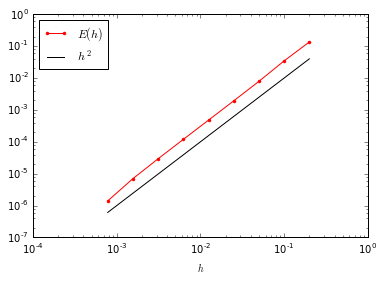

The order of the finite difference approximation is about 2.06974716776.


In [4]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)

# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
num_sol_best = prob2(lambda x:-1, eps=.1, alpha=1, beta=3, n=N[-1])
for j in range(len(N)-1):
    num_sol = prob2(lambda x:-1, eps=.1, alpha=1, beta=3, n=N[j])
    max_error[j] = np.max(np.abs( num_sol- num_sol_best[::2**(num_approx-j-1)] ))
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print "The order of the finite difference approximation is about " + str( (np.log(max_error[0]) - np.log(max_error[-1]) )/( np.log(h[0]) - np.log(h[-1]) ) ) + "."

### Problem 4

In [5]:
def prob4(a1, a2, a3, f, a, b, alpha, beta, n):
    h = (b-a)/n
    x = np.linspace(a,b,n+1)

    sub = np.diag((a1(x)/h**2 - a2(x)/(2*h))[2:-1], -1)  
    main = np.diag((-2*a1(x)/h**2 + a3(x))[1:-1])
    sup = np.diag((a1(x)/h**2 + a2(x)/(2*h))[1:-2], 1)
    
    A = sub + main + sup
    
    b = f(x[1:n])
    b[0] = b[0] - alpha*( a1(x)[0]/h**2 - a2(x)[0]/(2*h) )
    b[-1] = b[-1] - beta*( a1(x)[-1]/h**2 - a2(x)[-1]/(2*h) )
    
    return la.solve(A,b)

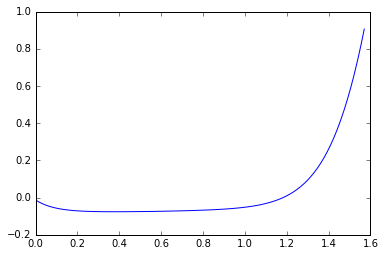

In [9]:
a1 = lambda x : .1*np.ones(len(x))
a2 = lambda x : np.zeros(len(x))
a3 = lambda x : -4*(np.pi - x**2)
f = lambda x : np.cos(x)

n = 100
a = 0
b = np.pi/2
alpha = 0
beta = 1

plt.plot(np.linspace(0, np.pi/2, n-1), 
         prob4(a1, a2, a3, f, a, b, alpha, beta, n))
plt.show()

### Problem 5

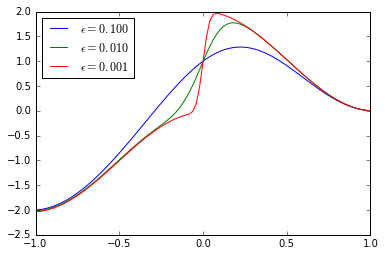

In [128]:
n = 100
a = -1
b = 1
alpha = -2
beta = 0

for eps in [0.1, 0.01, 0.001]:
    a1 = lambda x : eps*np.ones(len(x))
    a2 = lambda x : x
    a3 = lambda x : np.zeros(len(x))
    f = lambda x : -eps*np.pi**2*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)
    plt.plot(np.linspace(a,b,n-1), prob4(a1, a2, a3, f, a, b, alpha, beta, n), label="$\epsilon = %1.3f$"%eps)
plt.legend(loc='upper left')
plt.show()

### Problem 6

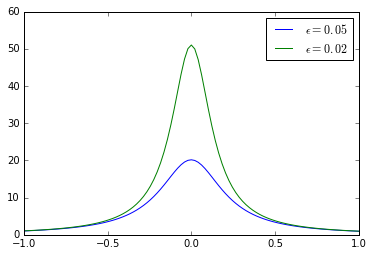

In [129]:
for eps in [0.05, 0.02]:
    a1 = lambda x : eps + x**2 
    a2 = lambda x : 4*x
    a3 = lambda x : 2*np.ones(len(x))
    f = lambda x : np.zeros(len(x))
    a = -1
    b = 1
    alpha = 1/(1+eps)
    beta = 1/(1+eps)
    plt.plot(np.linspace(a,b,n-1), prob4(a1, a2, a3, f, a, b, alpha, beta, n), label="$\epsilon = %1.2f$"%eps)
plt.legend()
plt.show()